# This is the Jupyter notebook template for Assignment 2

First, we load the needed modules (feel free to add more as needed)

In [53]:
%matplotlib inline
# Allows viewing figures inline in the notebook
import numpy as np
# Numpy is a library for numerical computation
import matplotlib.pyplot as plt
# Matplotlib is a plotting library
from skimage import io
# skimage is an image processing library; its io module allows loading and saving images (among other things)
from matplotlib import cm
# import colormaps
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,8)
# Sets larger size for viewed figures

### Template for Exercise 4: Derivatives and gradients for edge enhancement
First, we load and view the two images to be used in the exercise 

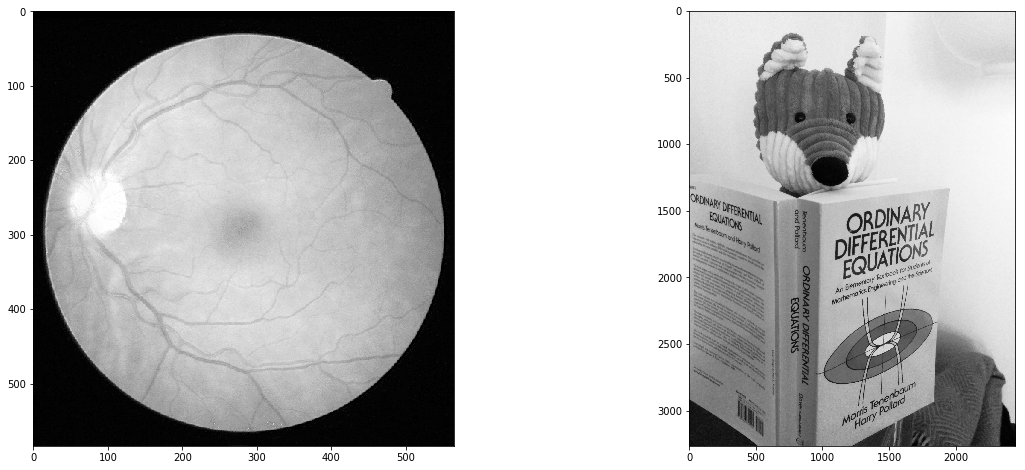

In [54]:
# reading the images in as numpy arrays
Iret = io.imread('data/retinal.png')
smartgirl = io.imread('data/smartgirl.jpg')

# viewing the two images next to each other
fig, ax = plt.subplots(1,2)               # makes an array consisting of two subplots in order to plot figures next to each other
ax[0].imshow(Iret, cmap=cm.Greys_r)       # visualizes the image Iret
ax[1].imshow(smartgirl, cmap=cm.Greys_r)

**Exercise 4 a-b)** Implement the finite difference partial derivatives with respect to x and y in the cell below, apply them to the two images, and plot the result

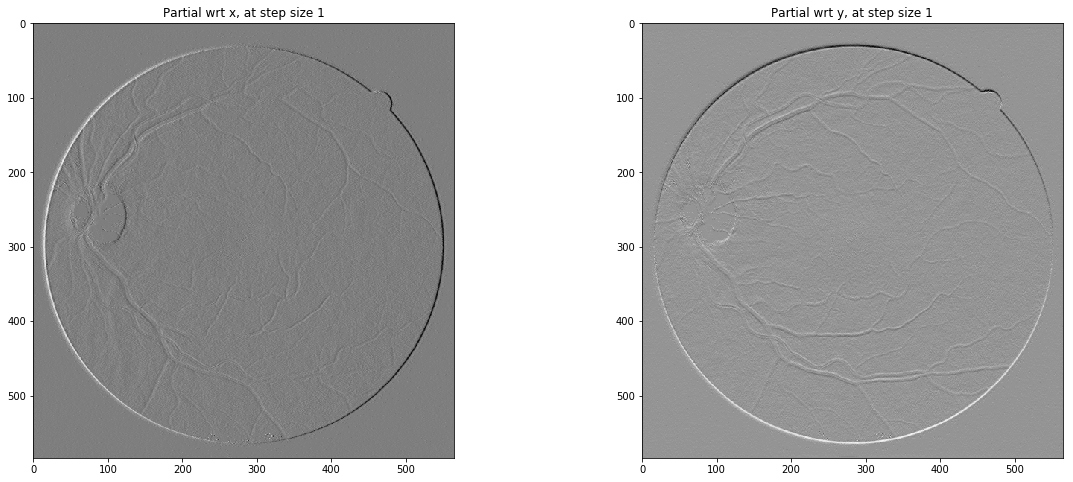

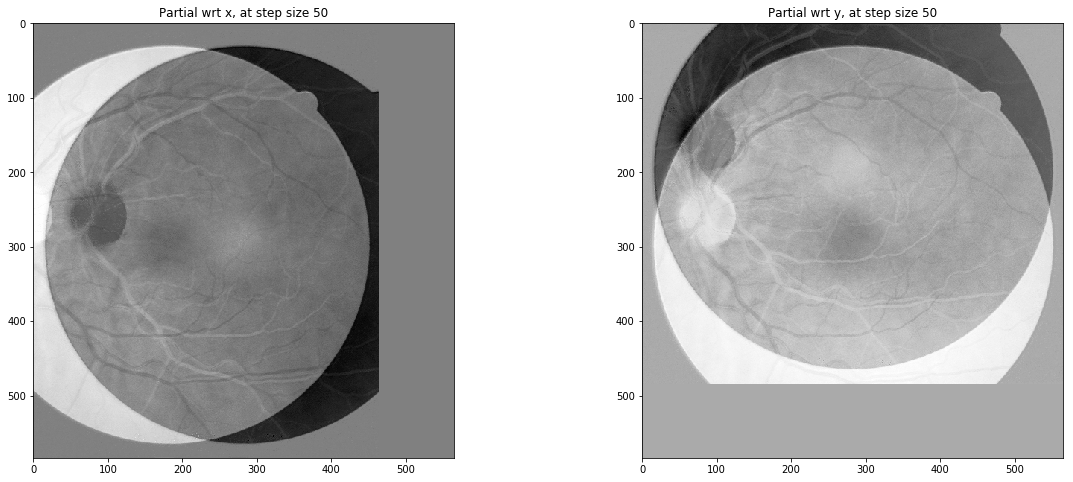

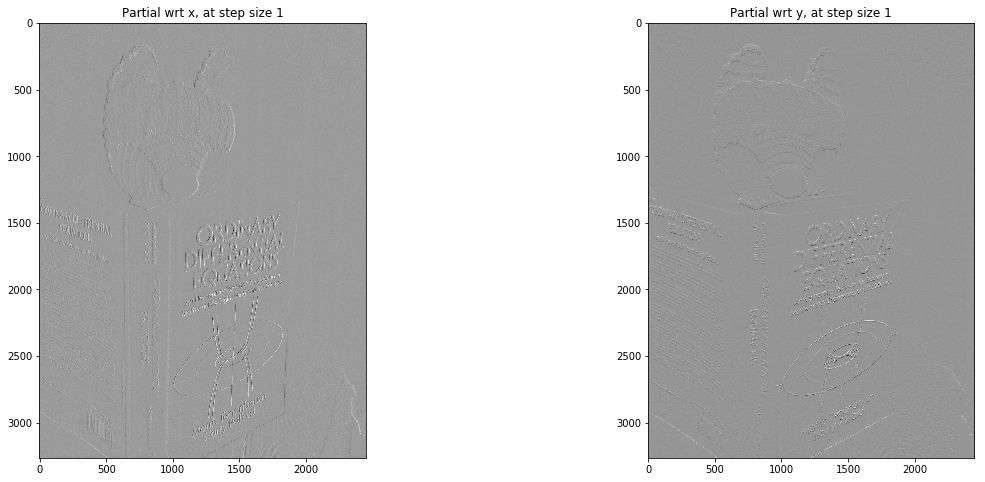

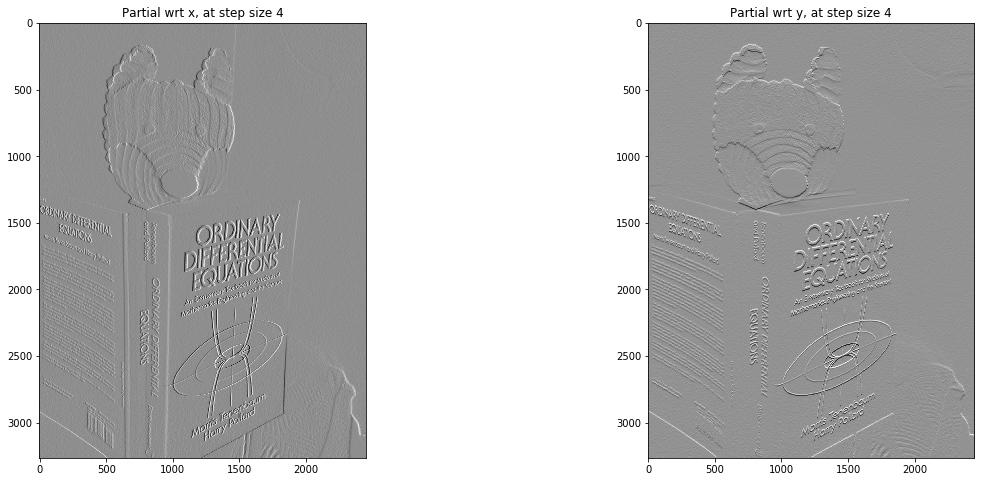

In [55]:
IRet = io.imread('data/retinal.png').astype(float)
smartGirl = io.imread('data/smartgirl.jpg').astype(float)

lecPic = io.imread('lecture/flower.jpeg').astype(float)
Igray = np.mean(lecPic, axis=2) 

#print("Original size:", IretGray.shape)
#print("Original size:", smartgirl.shape)

# Calculating the partial derivative with respect to x of the image
def xDiff(image, h, M):
    temp = (image[:,np.arange(2*h,M)] - image[:,np.arange(0,M-2*h)])
    
    # Padding with zeroes to make image the right shape
    xReduced = np.zeros(image.shape)
    xReduced[:temp.shape[0],:temp.shape[1]] = temp
    return xReduced

# Calculating the partial derivative with respect to y of the image
def yDiff(image, h, N):
    temp = (image[np.arange(0,N-2*h),:] - image[np.arange(2*h,N),:])
    
    # Padding with zeroes to make image the right shape
    yReduced = np.zeros(image.shape)
    yReduced[:temp.shape[0],:temp.shape[1]] = temp
    return yReduced

# Function for plotting and showing everything nicely
def partDiff(image, h):
    N, M = image.shape 
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].set_title('Partial wrt x, at step size %d' %h)
    ax[0].imshow(xDiff(image, h, M), cmap=cm.Greys_r)
    
    ax[1].set_title('Partial wrt y, at step size %d' %h)
    ax[1].imshow(yDiff(image, h, N), cmap=cm.Greys_r)
    
# Running everything with different step sizes
#partDiff(Igray,1)     # Testing with the picture from lectures
#partDiff(Igray,10)
#partDiff(Igray,25)
partDiff(IRet,1)
partDiff(IRet,50)
partDiff(smartGirl,1)
partDiff(smartGirl,4)

** Exercise 4 d)** Using your partial derivatives from above, implement the finite difference gradient and apply it to the two images

Original image size:	 (584, 565)
New image size:		 (584, 565)
Original image size:	 (3264, 2448)
New image size:		 (3264, 2448)


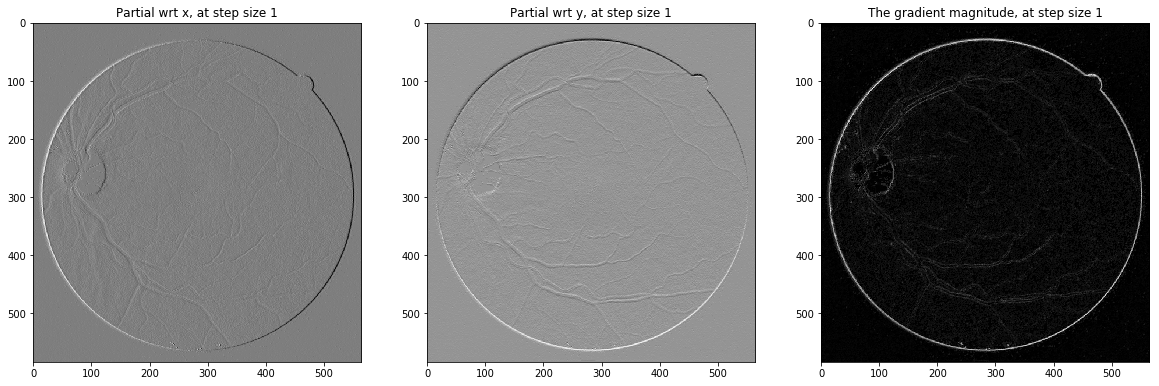

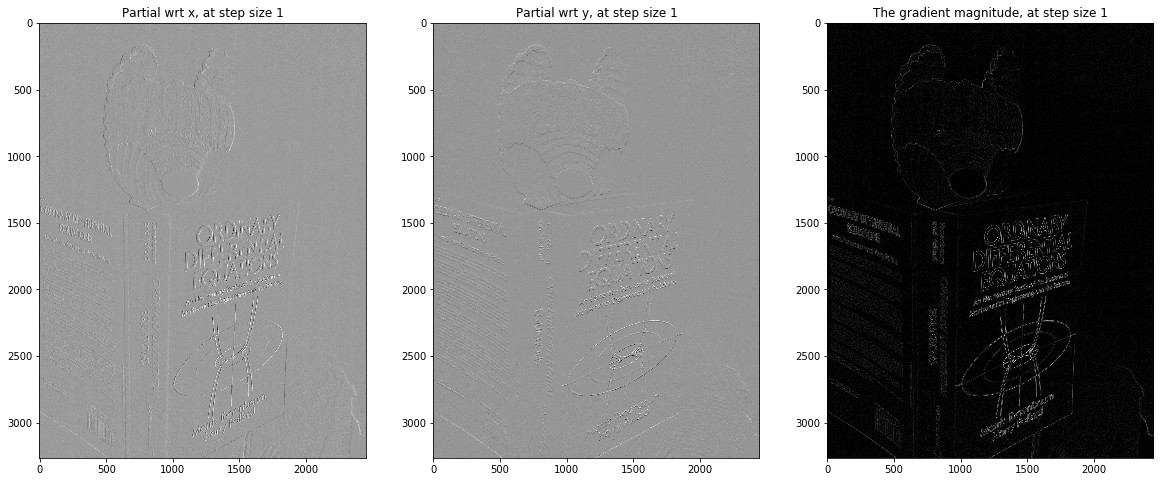

In [58]:
def gradeMag(image, h):
    N, M = image.shape

    tempXDiff = xDiff(image, h, M)
    tempYDiff = yDiff(image, h, N)
    
    newImage = np.sqrt(tempXDiff**2 + tempYDiff**2)

    # Showing that the original image and result are the same size
    print("Original image size:\t", image.shape)
    print("New image size:\t\t", newImage.shape)
    
    fig, ax = plt.subplots(1,3)
    
    ax[0].set_title('Partial wrt x, at step size %d' %h)
    ax[0].imshow(tempXDiff, cmap=cm.Greys_r)
    
    ax[1].set_title('Partial wrt y, at step size %d' %h)
    ax[1].imshow(tempYDiff, cmap=cm.Greys_r)
    
    ax[2].set_title('The gradient magnitude, at step size %d' %h)
    ax[2].imshow(newImage, cmap=cm.Greys_r)
    #plt.title('The gradient magnitude')

gradeMag(IRet, 1)
gradeMag(smartGirl, 1)
#gradeMag(smartgirl, 100)
#gradeMag(smartgirl, 3)
#gradeMag(smartgirl, 4)